In [1]:
import pandas as pd #data frame creation
import numpy as np #array value processing, argmax, etc

#data visualization
import matplotlib.pyplot as plt #charts
import seaborn as sns #graphs

#splitting of data
from sklearn.model_selection import train_test_split

#encoding the target
from sklearn.preprocessing import LabelEncoder



import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1',usecols=['v1','v2'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#number of missing

df.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

Text(0.5, 1.0, 'Number of ham and spam messages')

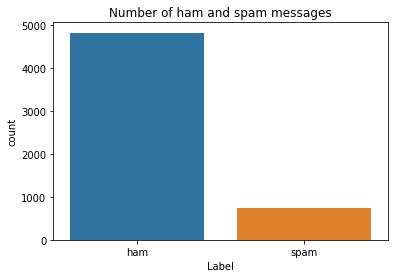

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
"""
Training and testing

label/target into separate variable
"""



In [3]:

X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1, 1) #2D array

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
X_train

5281               And how you will do that, princess? :)
1300    Those cocksuckers. If it makes you feel better...
5128    Wot about on wed nite I am 3 then but only til 9!
1808    Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
856                         Going to take your babe out ?
                              ...                        
1180                           I'm in chennai velachery:)
3441    Save money on wedding lingerie at www.bridal.p...
1344                     Were somewhere on Fredericksburg
4623    Jus finish blowing my hair. U finish dinner al...
1289    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
Name: v2, Length: 4457, dtype: object


Tokenize the data and convert the text to sequences.
Add padding to ensure that all the sequences have the same shape.
There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.


In [9]:
max_words = 1000 #record only 1000 unique words from the whole set
max_len = 150 #length of each message. If more words are present, trim them. if less words are present, pad with 0

#tokenize the sentence
tok = Tokenizer(num_words=max_words)
#fit tokens on text
tok.fit_on_texts(X_train)


#generate a sequence of integers!
sequences = tok.texts_to_sequences(X_train)
print(sequences)

#here
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

[[7, 48, 3, 31, 27, 19, 393], [407, 33, 15, 454, 3, 196, 300, 20, 7, 3, 142, 196, 370, 13, 208, 73], [494, 81, 18, 552, 1, 64, 159, 56, 24, 63, 478, 408], [4, 291, 110, 599, 70, 218, 125, 1, 64, 56, 792, 931, 24, 70, 300, 675, 382], [72, 2, 95, 12, 166, 49], [15, 118, 423, 2, 27, 34, 5, 175, 65, 4, 24, 337, 111, 633, 14, 145], [46], [89, 82, 20, 3, 676, 10], [55, 15, 634, 13, 124, 46], [225, 90], [65, 793, 2, 579, 240, 58, 39, 52, 28, 146, 24, 112, 199, 635, 176, 2, 10], [225, 677, 87, 10, 48, 1, 599, 32, 25, 30, 77, 8, 84, 600, 141], [553, 55, 4, 22, 65, 42, 66], [1, 349, 6, 107, 6, 862, 48, 286, 6, 80, 21, 10, 636, 6, 349, 6, 394], [2, 29, 177, 129], [9, 19, 53, 62, 3, 68, 10, 2, 57], [292, 253, 14, 6, 495, 141], [92, 3, 54, 39, 9, 5, 678, 62, 102, 118, 135, 58, 19, 23, 175, 1, 14, 53, 102, 338, 7, 121, 5, 61, 199, 26, 33, 176, 5, 61, 199, 23, 19, 40, 28, 29, 182, 65, 337], [932, 9, 39, 12, 115, 82, 65, 47, 794, 7, 53, 20, 3, 42, 2, 22], [44, 142, 1, 479, 5, 201], [225, 152, 10, 136,

In [11]:
# sequences_matrix.shape

print(sequences_matrix[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7
  48   3  31  27  19 393]


In [12]:
model = keras.Sequential([
    keras.layers.Embedding(max_words, 32),
    keras.layers.LSTM(32),

    keras.layers.Dense(1, activation="sigmoid") #output layer. 1 neuron only
])
model.compile(loss='binary_crossentropy',optimizer="rmsprop",metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 40,353
Trainable params: 40,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(sequences_matrix,Y_train,epochs=5,validation_split=0.2) #you can testing data for validation also

Epoch 1/5
112/112 [==============================] - 10s 72ms/step - loss: 0.3647 - accuracy: 0.8726 - val_loss: 0.1072 - val_accuracy: 0.9675
Epoch 2/5
112/112 [==============================] - 7s 66ms/step - loss: 0.0799 - accuracy: 0.9791 - val_loss: 0.0588 - val_accuracy: 0.9843
Epoch 3/5
112/112 [==============================] - 7s 67ms/step - loss: 0.0518 - accuracy: 0.9860 - val_loss: 0.0625 - val_accuracy: 0.9854
Epoch 4/5
112/112 [==============================] - 7s 67ms/step - loss: 0.0328 - accuracy: 0.9912 - val_loss: 0.0547 - val_accuracy: 0.9821
Epoch 5/5
112/112 [==============================] - 7s 67ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0614 - val_accuracy: 0.9843


In [ ]:
#check accuracy with testing data

In [15]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 0s 13ms/step - loss: 0.0594 - accuracy: 0.9794
